In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

41 41
Mean total refugees over 100 runs: 43726.0
Mean refugees in camps over 100 runs: 31200.54
Standard deviation of total refugees over 100 runs: 0.0
Standard deviation of refugees in camps over 100 runs: 81.71488001680976


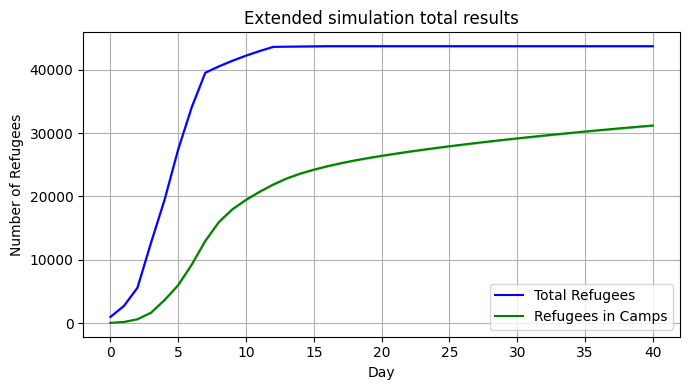

Mean total refugees at timestep 12: 43615.0
Mean refugees in camps at timestep 12: 21867.45
Standard deviation of total refugees at timestep 12: 0.0
Standard deviation of refugees in camps at timestep 12: 73.59805868651867


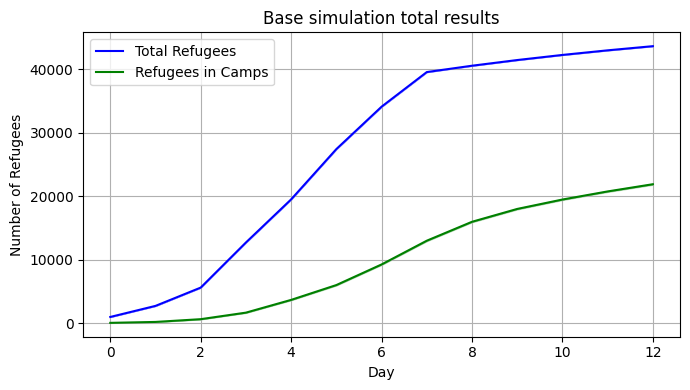

In [5]:
file_paths = sorted(glob.glob("runsL/out*.csv"))

total_refugees_runs = []
camp_refugees_runs = []

for file in file_paths:
    df = pd.read_csv(file)
    total_refugees_runs.append(df["total refugees (simulation)"])
    camp_refugees_runs.append(df["refugees in camps (simulation)"])

total_df = pd.concat(total_refugees_runs, axis=1)
camp_df = pd.concat(camp_refugees_runs, axis=1)

mean_total = total_df.mean(axis=1)
std_total = total_df.std(axis=1)

mean_camp = camp_df.mean(axis=1)
std_camp = camp_df.std(axis=1)

print(len(mean_total), len(std_total))
print("Mean total refugees over 100 runs:", mean_total[40])
print("Mean refugees in camps over 100 runs:", mean_camp[40])
print("Standard deviation of total refugees over 100 runs:", std_total[40])
print("Standard deviation of refugees in camps over 100 runs:", std_camp[40])

time = pd.read_csv(file_paths[0])["Day"]

plt.figure(figsize=(7, 4))

plt.plot(time, mean_total, label="Total Refugees", color='blue')
plt.fill_between(time, mean_total - std_total, mean_total + std_total, alpha=0.3, color='blue')

plt.plot(time, mean_camp, label="Refugees in Camps", color='green')
plt.fill_between(time, mean_camp - std_camp, mean_camp + std_camp, alpha=0.3, color='green')

plt.xlabel("Day")
plt.ylabel("Number of Refugees")
plt.title("Extended simulation total results")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Mean total refugees at timestep 12:", mean_total[12])
print("Mean refugees in camps at timestep 12:", mean_camp[12])
print("Standard deviation of total refugees at timestep 12:", std_total[12])
print("Standard deviation of refugees in camps at timestep 12:", std_camp[12])
plt.figure(figsize=(7, 4))
plt.plot(time[:13], mean_total[:13], label="Total Refugees", color='blue')
plt.fill_between(time[:13], mean_total[:13] - std_total[:13], mean_total[:13] + std_total[:13], alpha=0.3, color='blue')

plt.plot(time[:13], mean_camp[:13], label="Refugees in Camps", color='green')
plt.fill_between(time[:13], mean_camp[:13] - std_camp[:13], mean_camp[:13] + std_camp[:13], alpha=0.3, color='green')

plt.xlabel("Day")
plt.ylabel("Number of Refugees")
plt.title("Base simulation total results")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




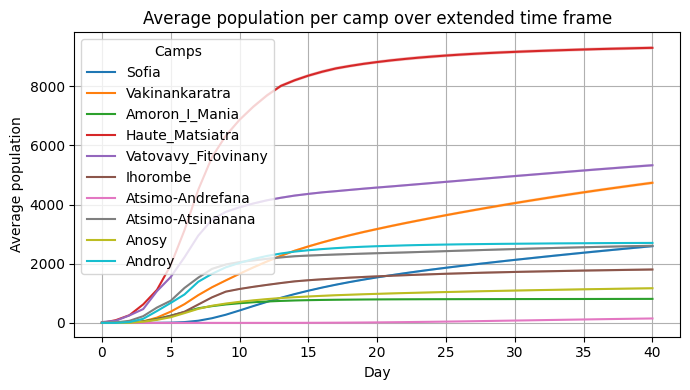

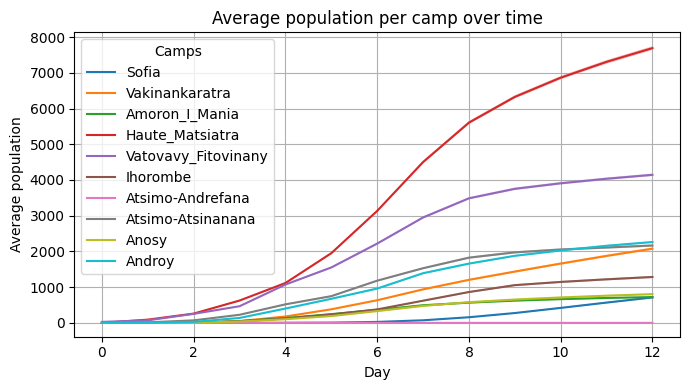

In [7]:
file_paths = sorted(glob.glob("runsL/out*.csv"))

example_df = pd.read_csv(file_paths[0])
camp_sim_cols = [col for col in example_df.columns if col.startswith("Camp_") and col.endswith("sim")]

camp_sim_runs = []
for file in file_paths:
    df = pd.read_csv(file)
    camp_sim_runs.append(df[camp_sim_cols])

n_runs = len(camp_sim_runs)
n_days = len(camp_sim_runs[0])
n_camps = len(camp_sim_cols)

data_array = np.stack([df.values for df in camp_sim_runs])  # shape: (n_runs, n_days, n_camps)

mean_data = data_array.mean(axis=0)
std_data = data_array.std(axis=0)

mean_df = pd.DataFrame(mean_data, columns=[col.replace("Camp_", "").replace(" sim", "") for col in camp_sim_cols])
std_df = pd.DataFrame(std_data, columns=mean_df.columns)

plt.figure(figsize=(7, 4))

for camp in mean_df.columns:
    plt.plot(mean_df.index, mean_df[camp], label=camp)
    plt.fill_between(
        mean_df.index,
        mean_df[camp] - std_df[camp],
        mean_df[camp] + std_df[camp],
        alpha=0.3
    )

plt.xlabel("Day")
plt.ylabel("Average population")
plt.title("Average population per camp over extended time frame")
plt.legend(title="Camps", loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
for camp in mean_df.columns:
    plt.plot(mean_df.index[:13], mean_df[camp][:13], label=camp)
    plt.fill_between(
        mean_df.index[:13],
        mean_df[camp][:13] - std_df[camp][:13],
        mean_df[camp][:13] + std_df[camp][:13],
        alpha=0.3
    )
    
plt.xlabel("Day")
plt.ylabel("Average population")
plt.title("Average population per camp over time")
plt.legend(title="Camps", loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
